In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<h3>Shape of dataset </h3>

In [4]:
#Shape of Dataset
df.shape

(70000, 13)

<h3>Information</h3>

In [6]:
#Coloumn Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<h3>Description</h3>

In [8]:
#description
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<h3>Missing Value</h3>

In [10]:
#Missing value
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<h3>Age in year</h3>

In [12]:
#age in year
df['age_year']=(df['age']/365).astype(int)
df=df.drop(columns=['age'])
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


<h3>Distribution of age </h3>

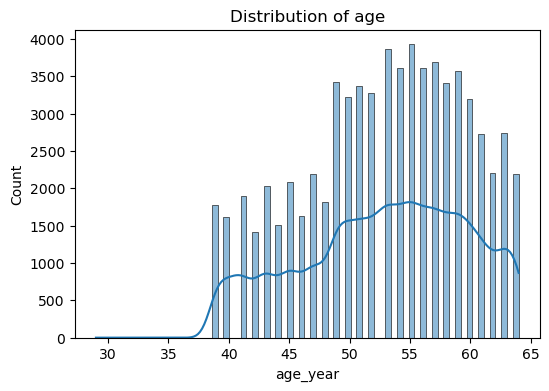

In [14]:
#age Distibution
plt.figure(figsize=(6,4))
sns.histplot(df['age_year'],kde=True)
plt.title("Distribution of age")
plt.show()

<h3>Blood Pressure (ap_lo,ap_hi)</h3>

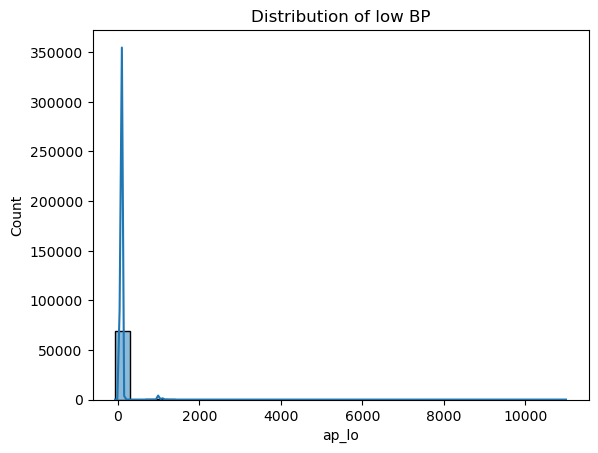

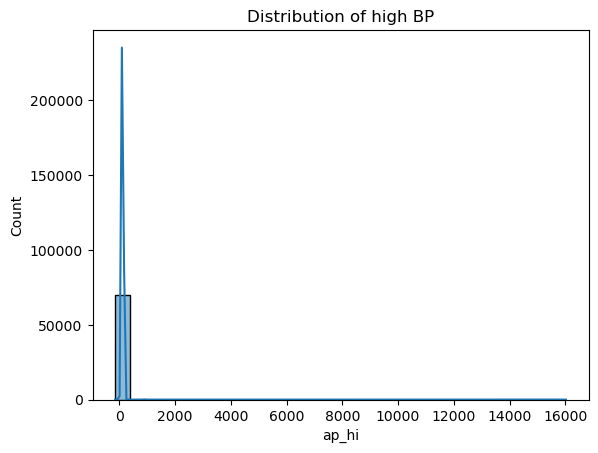

In [16]:
sns.histplot(df['ap_lo'],bins=30,kde=True)
plt.title("Distribution of low BP")
plt.show()

sns.histplot(df['ap_hi'],bins=30,kde=True)
plt.title("Distribution of high BP")
plt.show()

<h3>Cardio Vascular Disease Distribution</h3>

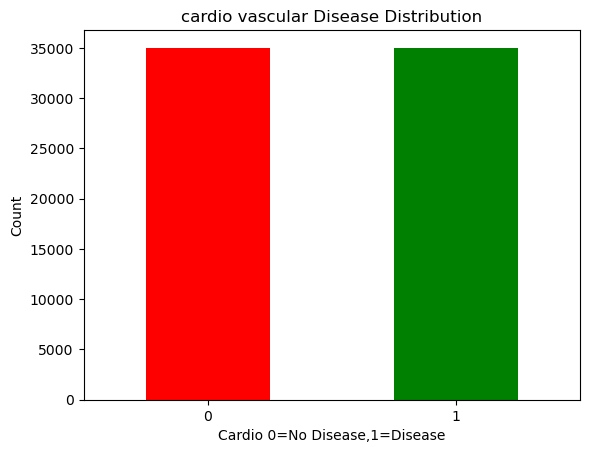

In [18]:
df['cardio'].value_counts().plot(kind='bar',color=['red','green'])
plt.title("cardio vascular Disease Distribution")
plt.xlabel("Cardio 0=No Disease,1=Disease")
plt.xticks(rotation=0)#To rotate X label
plt.ylabel('Count')
plt.show()

<H3> FEATURE(CHOLERSTROL) VS TARGET(DISEASE) </H3>

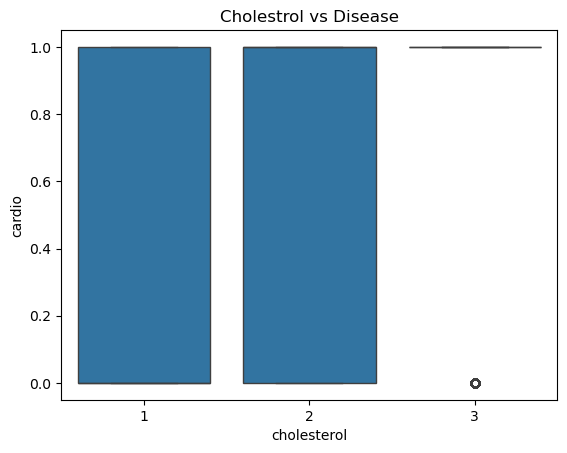

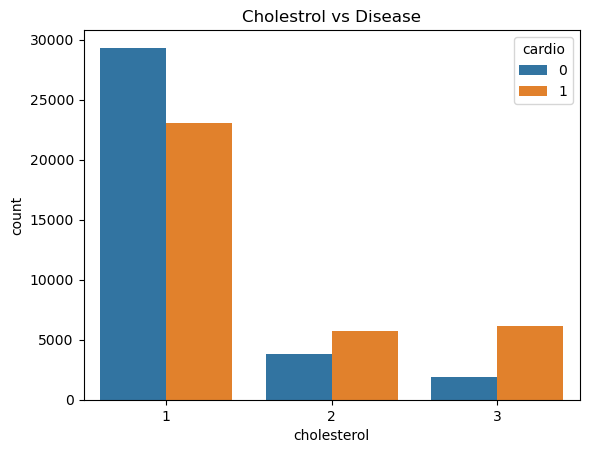

In [20]:
sns.boxplot(data=df,x='cholesterol',y='cardio')
plt.title("Cholestrol vs Disease")
plt.show()

sns.countplot(data=df,x='cholesterol',hue='cardio')
plt.title('Cholestrol vs Disease')
plt.show()

<h3>Outlier Detection</h3>

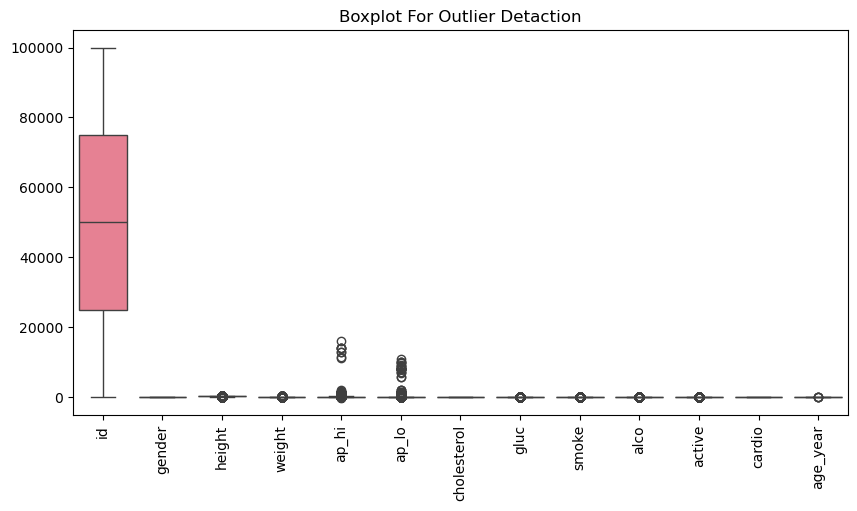

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot For Outlier Detaction")
plt.xticks(rotation=90) #to change how variable on x axis is shown
plt.show()

<h3>Handle Duplicates</h3>

In [24]:
#handle duplicates
print("duplicates before:",df.duplicated().sum())

duplicates before: 0


<h3>Check for outlier</h3>

In [26]:
#check for outlier
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


<h3>Handling Outlier</h3>

In [28]:
df = df[df['ap_hi'] >= df['ap_lo']] #We remove these rows because systolic BP (ap_hi) can never be lower than diastolic BP (ap_lo), so such records are medically invalid.


In [29]:
#height
df = df[(df['height'] >= 120) & (df['height'] <= 220)]


In [30]:
# weight
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]


In [31]:
df['ap_hi'] = df['ap_hi'].clip(lower=80, upper=200) #this is used to take data in normal range without removing it


In [32]:
df['ap_lo'] = df['ap_lo'].clip(lower=50, upper=120) #this is used to take data in normal range without removing it


In [33]:
#We do this to identify the normal weight range and handle extreme values safely.
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1


In [34]:
#We use this to set safe lower and upper limits for normal values so extreme weights can be controlled without deleting data.
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [35]:
df['weight'] = df['weight'].clip(lower, upper) #This limits extreme weight values so they don’t confuse the model.


In [36]:
#Check dataset for outlier
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000
mean,49976.239270,1.348615,164.413527,73.843522,126.700956,81.272366,1.364756,1.225706,0.087878,0.053341,0.803417,0.494768,52.828218
std,28843.653505,0.476535,7.912203,13.397452,16.714585,9.419327,0.678928,0.571562,0.283119,0.224714,0.397417,0.499976,6.769061
min,0.000000,1.000000,120.000000,39.500000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25008.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50023.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74867.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,207.000000,107.500000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


<h3>Encoded coloumns</h3>


In [38]:
df.nunique()

id             68709
gender             2
height            73
weight           192
ap_hi            100
ap_lo             68
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
age_year          28
dtype: int64

In [39]:
#bmi
df['bmi']=df['weight']/(df['height']/100)**2
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


<h3>pipline</h3>

In [41]:
#Features and Targets
#all feature column except cardio is in variable x and target column cardion in variable y
x=df.drop(columns=['cardio'],)
y=df['cardio']

In [42]:
#numeric coloumn for scalling
nums_col=['height','weight','ap_hi','ap_lo','bmi','age_year']

<h3>Train-Test-Split</h3>

In [44]:
#Train-Test-Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [45]:
#Scaling
scaler=StandardScaler()
x_train[nums_col]=scaler.fit_transform(x_train[nums_col])
x_test[nums_col]=scaler.transform(x_test[nums_col])

In [46]:
#Save our pre-process dataset
df.to_csv("preprocess.csv",index=False)

<h3>Model Creation<h3></h3>

In [48]:
X_train_np = x_train.values
X_test_np = x_test.values

y_train_np = y_train.values
y_test_np = y_test.values


In [49]:
# STEP 1: Scale features
mean = X_train_np.mean(axis=0) #Average 
std = X_train_np.std(axis=0) #to check how much spread

std[std == 0] = 1  # safety If any column has std = 0, replace it with 1

X_train_np = (X_train_np - mean) / std #used to make value small and equal
X_test_np = (X_test_np - mean) / std


In [50]:
#Sigmoid function
#use for converting number to probability 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [51]:
# weights = np.zeros(X_train_np.shape[1])
# STEP 2: Initialize weights
np.random.seed(1) #fix random no
weights = np.random.randn(X_train_np.shape[1]) * 0.01
bias = 0


In [52]:
learning_rate = 0.1
epochs = 8000

for i in range(epochs):
    z = np.dot(X_train_np, weights) + bias #to find dot product 
    y_pred = sigmoid(z)

    dw = (1 / len(y_train_np)) * np.dot(X_train_np.T, (y_pred - y_train_np)) #calculates how much to change each weight to reduce the error.
    db = (1 / len(y_train_np)) * np.sum(y_pred - y_train_np) #calculates how much to change the bias to reduce the error.

    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db


In [53]:
def predict(X):
    z = np.dot(X, weights) + bias #calculate raw score
    probs = sigmoid(z)
    return np.array([1 if p >= 0.45 else 0 for p in probs])


In [54]:
y_pred_test = predict(X_test_np)

accuracy = np.mean(y_pred_test == y_test_np)
print("Accuracy:", accuracy)


Accuracy: 0.727259496434289


<h3>Confusion Matrix</h3>

In [56]:
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[5028, 1915],
       [1833, 4966]], dtype=int64)

<h3>This heatmap visually represents correct and incorrect predictions.
</h3>

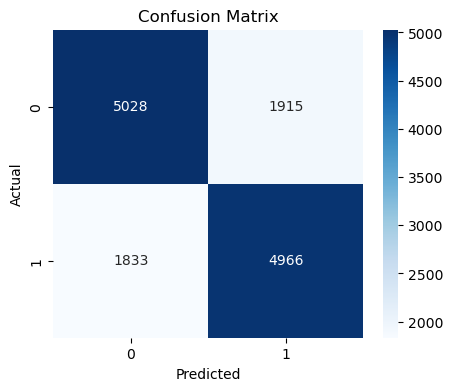

In [58]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<h3>Precision measures correct positive predictions.
Recall measures ability to identify actual positives.
F1-score balances precision and recall.
</h3>

In [60]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6943
           1       0.72      0.73      0.73      6799

    accuracy                           0.73     13742
   macro avg       0.73      0.73      0.73     13742
weighted avg       0.73      0.73      0.73     13742



In [61]:
y_prd_test=predict(x_train)
train_acuuracy=np.mean(y_pred_test==y_test_np)
print(f"Accuracy: {train_acuuracy:.2f}")


Accuracy: 0.73


In [62]:
print("Training Acuuracy=",train_acuuracy)
print("Testing Accuracy=",accuracy)

#The training accuracy and testing accuracy are almost equal.
#This indicates that the model is well fitted and does not suffer
#from overfitting or underfitting.


Training Acuuracy= 0.727259496434289
Testing Accuracy= 0.727259496434289


<h3>Applying Logistic Regression</h3>

In [64]:
#We use RobustScaler to scale features so they’re on a similar range while reducing the impact of outliers.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [65]:
from sklearn.linear_model import LogisticRegression


In [66]:
model = LogisticRegression(max_iter=1000) #max_iter=1000 lets the model run more steps to find the best solution.


In [67]:
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [68]:
y_pred = model.predict(X_test_scaled)


In [69]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7290059671081356


In [70]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [71]:
rf=RandomForestClassifier(random_state=42)#Create a Random Forest model
cv_score=cross_val_score(rf,X_train_scaled,y_train,cv=5)#Check model performance
print("Cross Validation Accuracy:",cv_score.mean())#Print the average accuracy
rf.fit(X_train_scaled, y_train)
print("Is fitted:", hasattr(rf, "estimators_"))


Cross Validation Accuracy: 0.7202685549758863
Is fitted: True


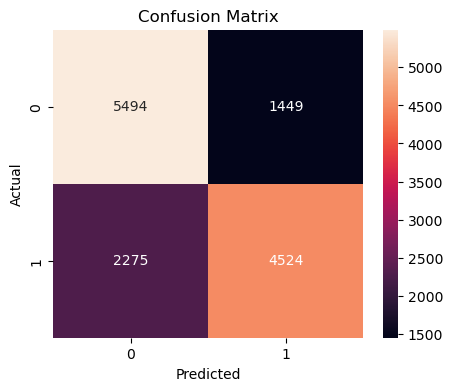

In [72]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [127]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,        # reduced from default
    max_depth=10,           # limit tree depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [129]:
print("Model fitted:", hasattr(rf, "estimators_"))


Model fitted: True


In [131]:
import joblib
import os

os.makedirs("model", exist_ok=True)

joblib.dump(rf, "model/rf_model.joblib", compress=3)
joblib.dump(scaler, "model/scaler.joblib")

print("Model size:", os.path.getsize("model/rf_model.joblib") / (1024*1024), "MB")


Model size: 1.224344253540039 MB


In [135]:
from joblib import load
load("model/rf_model.joblib")
print("Model load OK")


Model load OK


## Short Summary 

Defined problem: binary classification task

Loaded dataset and performed initial exploration (shape, info, describe)

Analyzed feature distributions and target variable behavior

Handled missing values and cleaned the dataset

Encoded categorical variables and scaled numerical features using StandardScaler

Performed EDA with count plots, histograms, bar chart, and box plots

Split dataset into Train–Test sets with stratification (80/20)

Implemented custom binary classification model from scratch using sigmoid & gradient descent

Trained model and generated predictions on test data

Evaluated model using accuracy and confusion matrix

Achieved ~72.65% accuracy

Compared training and testing accuracy; model shows no overfitting or underfitting